In [1]:
import numpy as np
import matplotlib.pyplot as plt

Manually generate data

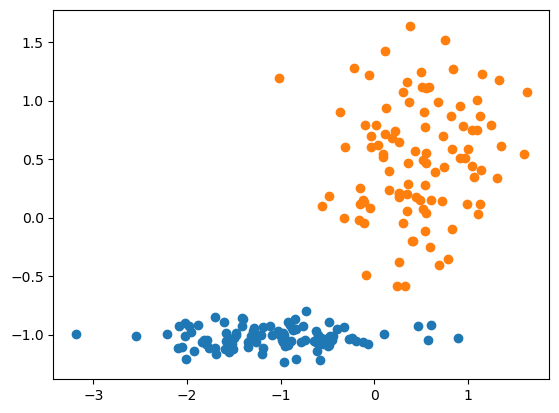

In [24]:
# generate dataset with two classes (labeled as 10 and 01, i.e. one-hot encoding)

cls1 = np.column_stack((np.random.normal(loc = [-1, -1], scale=[.8, .1], size=(100, 2)), np.ones(100), np.zeros(100)))
cls2 = np.column_stack((np.random.normal(loc = [0.5, 0.5], scale=[.5, .5], size=(100, 2)), np.zeros(100), np.ones(100)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :2]
# labels are used for illustration only
labels = data_set[:, 2:]

plt.scatter(features[labels[:, 1] == 0][:, 0], features[labels[:, 1] == 0][:, 1])
plt.scatter(features[labels[:, 1] == 1][:, 0], features[labels[:, 1] == 1][:, 1])

Define distortion measure as object function

In [25]:
def dist(x, y):
    return np.sum(np.square(x - y))

# E Step
def expection(xs, mu_1, mu_2):
    res = []
    for x in xs:
        d1 = dist(x, mu_1)
        d2 = dist(x, mu_2)
        if d1 < d2 : # close to cluster 1
            res.append([1, 0])
        else: # close to cluster 2
            res.append([0, 1])
    return np.array(res)

# M step
def maximization(xs, ys):
    mu_1 = np.sum(xs[ys[:, 0] == 1], axis=0) / np.sum(ys[:, 0])
    mu_2 = np.sum(xs[ys[:, 0] == 0], axis=0) / np.sum(ys[:, 1])
    return mu_1, mu_2


Define EM algorithm

In [26]:
# EM algorithm
n_iter = 100

# assume 2 clusters, randomly initialize their ceneters in range [-2, 2]
mu_1 = (np.random.rand(2) - 0.5) * 4
mu_2 = (np.random.rand(2) - 0.5) * 4

for i in range(n_iter):
    rs = expection(features, mu_1, mu_2)
    mu_1_new, mu_2_new = maximization(features, rs)
    if np.allclose(mu_1, mu_1_new) and np.allclose(mu_2, mu_2_new):
        break
    mu_1 = mu_1_new
    mu_2 = mu_2_new

i, mu_1, mu_2

(6, array([0.47299366, 0.43634731]), array([-1.15010412, -1.0239447 ]))